# Lets try another model: MultiClass Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
sns.set()
from sklearn.metrics import f1_score


## Load and preprocess data

In [93]:
df = pd.read_csv('./data/features_train_final.csv')
#df = pd.read_csv('./data/features_filtered.csv')

df.head()

df.shape
unique_battleneturls = df['battleneturl'].unique()

print(f"Total unique battleneturl values: {len(unique_battleneturls)}")
print(unique_battleneturls)


Total unique battleneturl values: 200
[ 53  29  35  24  40  17  49  16  11  54  61  25  18   0  32   2   3   9
  34   4  30  50  13  52  28  60  20  31  44   8  23  59  10   6  15  45
  21  26  58   5  38   7  14  37  48 177 157 169 151 165 163 152 164  64
 150 188 184 171 162 159 186 174 161 132  63 172  65 134  62 183 141 146
 156 143 158 138 142 182 144 153 135 160 176 179 155 133 136 166 140 175
 148 180 170  86  85 100  66  95  80 131  73 120  70 101 106  92 117 108
  89  74  67 122  81 128  82  96  99 116 105  98 121 123  77  68  90  78
  71 102  93 111  87 124 126 107  88 119 113 118 109  76  94 112  83  72
 130   1  19  46  12  27  43  42  33  47  39  57  51 187 149 173 145 185
 178 154 168 181  22  56  55  36  41 167 139 137 147 103  69 127  79  75
 104 114 125 115  91 129  84 110  97 199 191 190 195 198 197 193 196 194
 189 192]


In [ ]:

X = df.drop(['battleneturl'], axis=1)
y = df['battleneturl']

## Encode Target Variable
As battleneturl is a categorical variable, we need to convert it to numbers (Logistic regression requires numeric labels):

In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert categories to integers

# Handle missing values (fill with 0 for numerical features)
X.fillna(0, inplace=True)

y_encoded.shape


(3044,)

## Split Datset
stratify=y_encoded ensures class balance in train-test split.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,hotkey00,...,hotkey80_f5,hotkey82_f5,hotkey90_f5,hotkey92_f5,s_f5,Base_f5,SingleMineral_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
781,0.030179,0.000664,0.000000,7.106061,0.037823,0.000923,0.961255,0.006897,0.000000,0.000000,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,True,False,False
2629,0.105058,0.000285,0.005694,9.103448,0.057604,0.000000,0.942396,0.001863,0.037267,0.000621,...,0.0,0.0,1.0,0.0,4.0,2.0,0.0,False,True,False
227,0.054854,0.000095,0.000095,9.628571,0.024931,0.004848,0.970222,0.000939,0.000939,0.000000,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,False,True,False
365,0.116352,0.001329,0.000000,11.010949,0.023609,0.034289,0.942102,0.010256,0.000000,0.000000,...,0.0,0.0,0.0,0.0,6.0,1.0,0.0,False,False,True
2404,0.119484,0.007118,0.000095,10.798319,0.076799,0.000000,0.923201,0.062762,0.000837,0.000000,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.089589,0.000000,0.001424,9.551282,0.081068,0.000494,0.918438,0.000000,0.009585,0.002556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,True,False
1095,0.108095,0.004840,0.000190,10.379592,0.040650,0.016999,0.942350,0.041633,0.001633,0.000000,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,False,False,True
1130,0.035494,0.000380,0.000000,15.341463,0.040371,0.013898,0.945731,0.006504,0.000000,0.000000,...,0.0,0.0,1.0,0.0,3.0,2.0,0.0,False,False,True
1294,0.087406,0.000000,0.012907,12.275472,0.033212,0.000000,0.966788,0.000000,0.101873,0.000749,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,False,True,False


## Scale Features
Logistic regression converges faster with scaled data.

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled


array([[-0.93136451, -0.46427575, -0.27512056, ...,  1.24703215,
        -0.59331834, -0.73098668],
       [ 0.83213928, -0.57935518,  2.57802491, ..., -0.80190394,
         1.68543585, -0.73098668],
       [-0.35023525, -0.63689489, -0.22756813, ..., -0.80190394,
         1.68543585, -0.73098668],
       ...,
       [-0.80619821, -0.55058532, -0.27512056, ..., -0.80190394,
        -0.59331834,  1.36801399],
       [ 0.41640835, -0.66566474,  6.19200916, ..., -0.80190394,
         1.68543585, -0.73098668],
       [ 0.98636205,  2.21132078, -0.27512056, ...,  1.24703215,
        -0.59331834, -0.73098668]])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Create an imputer to fill NaN values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Apply imputer to X_train_scaled and X_test_scaled
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Hyperparameter tuning using GridSearchCV with StratifiedKFold
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear','newton-cg']}
stratified_kfold = StratifiedKFold(n_splits=2)  # Reduced to 2 splits

grid_search = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42), param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train_scaled_imputed, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Params: {grid_search.best_params_}") 

/Users/sofialtman/ML/OT02---Data-Mining/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Params: {'C': 10, 'solver': 'newton-cg'}


## Train Multiclass Logistic Regression

In [102]:
# Use the best model found
best_model = grid_search.best_estimator_

# Make predictions with the best model on the test data
y_pred = best_model.predict(X_test_scaled_imputed)

## Evaluate model

In [103]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

Accuracy: 0.85
F1-Score: 0.84


Had we used filtered features, once again, our accuracy would have went down:

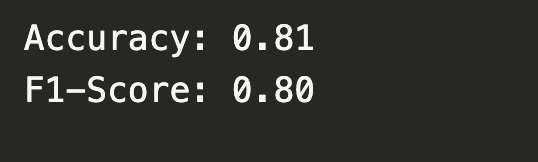

## Lets look for a better score by changing the hyperparameters

### changing C

In [47]:
best_model2 = LogisticRegression(random_state=42, solver='lbfgs', max_iter=5000, C=2)  # default value of C=1.0
best_model2.fit(X_train, y_train) #training the model


LogisticRegression(C=2, max_iter=5000, random_state=42)

In [48]:
f1 = f1_score(y_test, best_model2.predict(X_test), average='weighted')
print("F1 Score after tuning C:", f1)

F1 Score after tuning C: 0.8371970303004785


### changing solver

In [49]:
best_model3 = LogisticRegression(random_state=42, solver='saga', max_iter=5000, C=2.0)
best_model3.fit(X_train, y_train) #training the model


LogisticRegression(C=2.0, max_iter=5000, random_state=42, solver='saga')

In [50]:
f1 = f1_score(y_test, best_model3.predict(X_test), average='weighted')
print("F1 Score with saga solver:", f1)

F1 Score with saga solver: 0.8263440460930062


Therefore, we decided on leaving the hyperparameters before tuning

## Feature Importance

In [51]:
# Feature importance
importances = best_model.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                 Feature  Importance
71    played_race_Terran    1.120102
28              hotkey61    0.909101
18              hotkey30    0.736792
6               ratio_x2    0.634600
39                     s    0.526362
..                   ...         ...
4               ratio_x0   -0.785026
3   action_per_5_seconds   -0.973073
15              hotkey20   -1.022106
23              hotkey42   -1.181902
12              hotkey10   -1.495081

[73 rows x 2 columns]


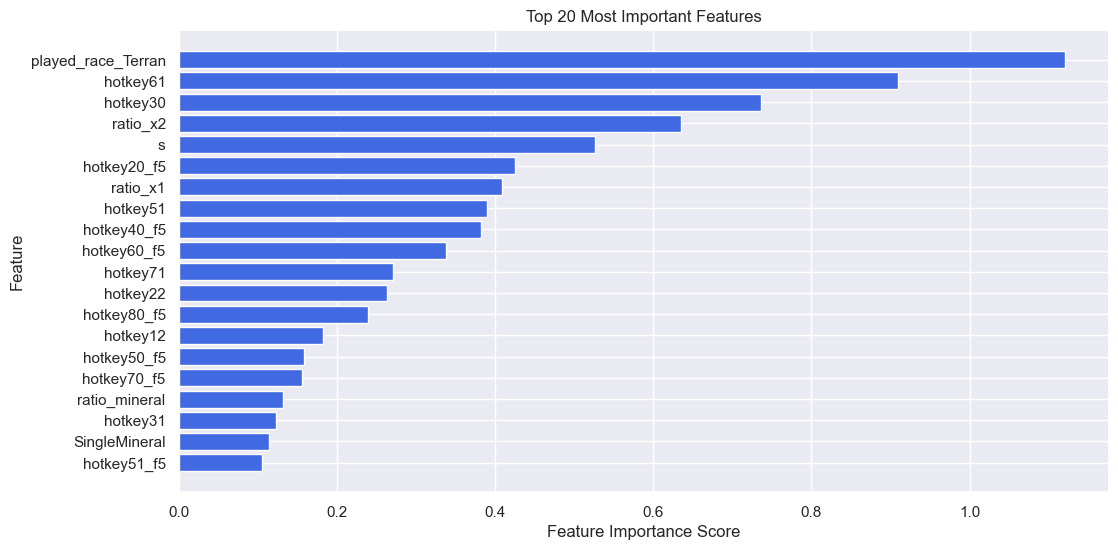

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features")
plt.gca().invert_yaxis()  # Flip to show most important features on top

## Predict on test set

In [104]:
#load the calculated features on the test set
df_test = pd.read_csv('./data/features_test_final.csv')
df_test.head(5)

,ratio_s,ratio_base,ratio_mineral,action_per_5_seconds,ratio_x0,ratio_x1,ratio_x2,Base,SingleMineral,hotkey00,...,hotkey80_f5,hotkey82_f5,hotkey90_f5,hotkey92_f5,s_f5,Base_f5,SingleMineral_f5,played_race_Protoss,played_race_Terran,played_race_Zerg
0,0.124395,0.002787,0.000440,18.674286,0.019583,0.013333,0.967083,0.021714,0.003429,0.016000,...,0,0,1,0,6,0,0,False,False,True
1,0.083908,0.000000,0.000000,11.301020,0.032219,0.000000,0.967781,0.000000,0.000000,0.002030,...,0,0,0,0,1,0,0,False,True,False
2,0.081561,0.002934,0.000000,14.442149,0.046217,0.000000,0.953783,0.016529,0.000000,0.000826,...,1,0,0,0,5,2,0,True,False,False
3,0.232947,0.002494,0.000293,10.458333,0.064677,0.069652,0.865672,0.011565,0.001361,0.000000,...,0,0,0,0,5,0,0,False,False,True
4,0.034619,0.003081,0.000000,4.206349,0.134545,0.025455,0.840000,0.031818,0.000000,0.004545,...,0,0,0,0,3,2,0,True,False,False


In [106]:
# Compare column names
train_columns = set(X_train.columns)  # Columns from the training data
test_columns = set(df_test.columns)    # Columns from the test data

# Apply the same preprocessing steps to the new data
X_test_new = df_test
X_test_new = scaler.transform(X_test_new)  # Use the same scaler

# Handle missing values in the new data

# Make predictions on the new data using the best model
y_pred_new = best_model.predict(X_test_new)



In [108]:
# Create DataFrame with RowId and predicted battleneturl
df = pd.DataFrame({
    'RowId': range(1,len(y_pred_new)+1),
    'prediction': y_pred_new
})

csv_filename = f"predictions_lr_kaggle_test.csv"


df.to_csv(f'data/predictions/{csv_filename}', index=False)


## Final submit 
not with filtered features as we got better results without them (training on all features)

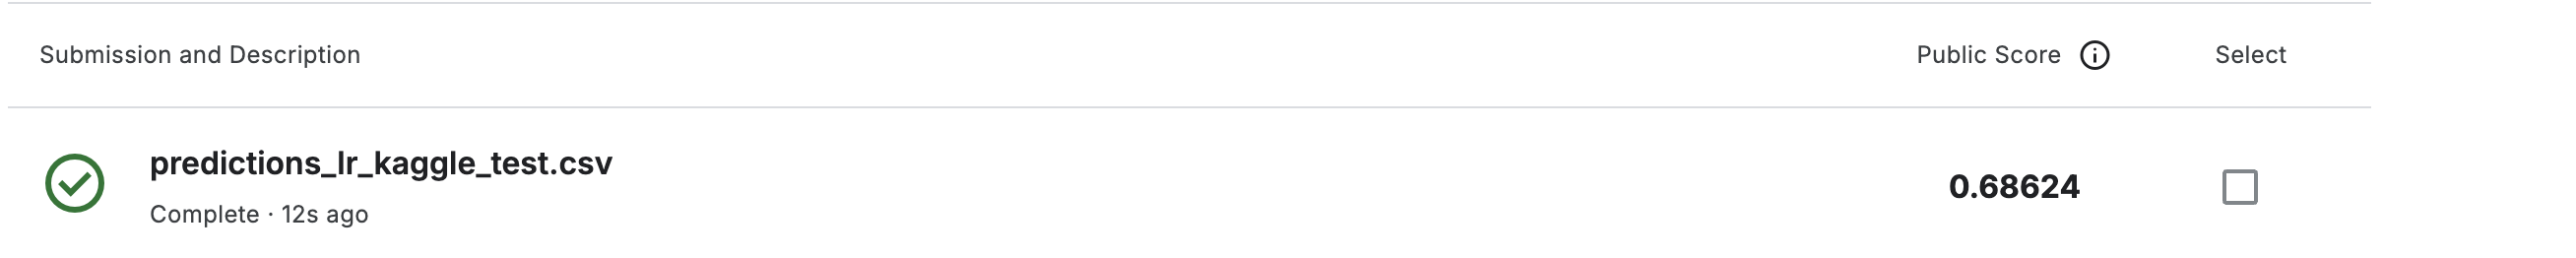